In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# 左下起逆时针
Phi = np.array(
    [[-0.2],
    [0.7],
    [-0.3],
    [0.4]]
)

In [3]:
A = np.array(
    [[1, 0, 0, 0],
    [1, 1, 0, 0],
    [1, 1, 1, 1],
    [1, 0, 1, 0]]
)
a = np.linalg.solve(A, Phi)

In [4]:
print(a)

[[-0.2]
 [ 0.9]
 [ 0.6]
 [-1.6]]


In [9]:
a[0] + a[1] * 1 + a[2] * 1 + a[3]

array([-0.3])

In [5]:
def bisect(a,b,c,tol=1e-4):
    mid = -b/(2*a)
    res = a*mid**2 + b*mid + c
    if mid < 0:
        return 0

    if res * c > 0:
        return 0
    tl = 0
    tr = mid 
    
    while np.abs(res) > tol:
        mid = (tl+tr)/2
        res = a*mid**2 + b*mid + c
        if res * c < 0:
            tr = mid
        else:
            tl = mid
     #   print(res,c,mid)
    #print("hit!!")
    return mid[0]

def rootSolve(a,b,c):
    delta = b**2 - 4*a*c
    if delta < 0:
        return 0
    if delta == 0:
        return np.max([-b/(2*a),0.0])
    return np.max([0.0,np.min([(-b + np.sqrt(delta))/(2*a),(-b - np.sqrt(delta))/(2*a)])])

def perRender(a,rayOrig = np.array([0.5,1.5])):
    #if rayOrig[1] > 1.0:
    #    dirY = -1
    #if rayOrig[1] < 0.0:
    #    dirY = 1
    dirY = np.random.rand() - 0.5
    dirX = (np.random.rand() - 0.5)
    #dirX = 8*(np.random.rand())
    #print(dirX)
    norm = np.sqrt(dirX**2 + dirY**2)
    rayDir = np.array([dirX/norm,dirY/norm])

    A = a[3] * dirX * dirY 
    B = a[1] * dirX + a[2] * dirY + a[3] * (rayOrig[0] * dirY + rayOrig[1] * dirX) 
    C = a[0] + a[1] * rayOrig[0] + a[2] * rayOrig[1] + a[3] * rayOrig[0] * rayOrig[1]

    #intTime = bisect(A,B,C,tol=1e-10)
    intTime = rootSolve(A,B,C)
    intPoint = rayOrig + intTime * rayDir

    return intTime,intPoint


In [6]:
numrays = 100000
hittimeListUp = []
hitpointListUp = []
hittimeListLow = []
hitpointListLow = []
for i in range(numrays):
    time,point = perRender(a)
    hitpointListUp.append(point)
    hittimeListUp.append(time)
"""
for i in range(numrays):
    time,point = perRender(a,rayOrig = np.array([0.5,-1.5]))
    hitpointListLow.append(point)
    hittimeListLow.append(time)
#print(hitpointList)
"""

'\nfor i in range(numrays):\n    time,point = perRender(a,rayOrig = np.array([0.5,-1.5]))\n    hitpointListLow.append(point)\n    hittimeListLow.append(time)\n#print(hitpointList)\n'

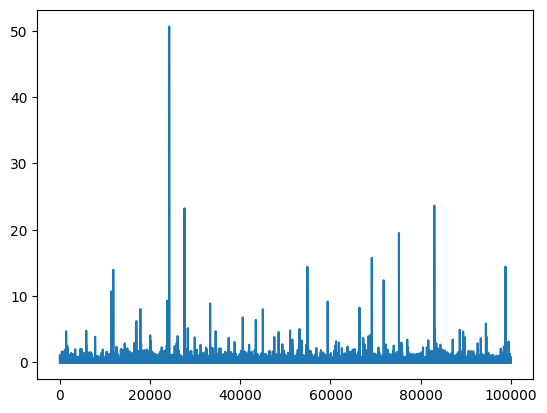

In [7]:
plt.plot(hittimeListUp)

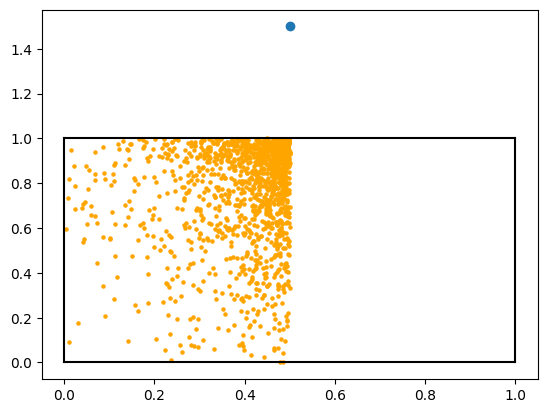

In [8]:
plt.plot([0,0],[0,1],color = 'black')
plt.plot([0,1],[1,1],color = 'black')
plt.plot([1,1],[1,0],color = 'black')
plt.plot([1,0],[0,0],color = 'black')
plt.scatter(0.5,1.5)
for ind in range(len(hitpointListUp)):
    if hittimeListUp[ind] != 0 and hitpointListUp[ind][0] > 0 and hitpointListUp[ind][0] < 1 and hitpointListUp[ind][1] > 0 and hitpointListUp[ind][1] < 1:
        plt.scatter(hitpointListUp[ind][0],hitpointListUp[ind][1],color = 'orange',s=5)

#for ind in range(len(hitpointListLow)):
#    if hittimeListLow[ind] != 0:
#        plt.scatter(hitpointListLow[ind][0],hitpointListLow[ind][1],color = 'blue',s=5)